# 1) Transfer Learning with MobileNet V2

#### Introduction
In this notebook, I demonstrate the application of transfer learning using MobileNet V2, a lightweight convolutional neural network architecture, for a specific task. Transfer learning with MobileNet V2 is particularly useful when working with limited computational resources or deploying models on mobile or edge devices.

#### MobileNet V2 Overview
MobileNet V2 is an efficient convolutional neural network architecture designed for mobile and embedded vision applications. It is an extension of the original MobileNet architecture, featuring improved performance and reduced computational complexity. MobileNet V2 achieves a good balance between model size, accuracy, and speed, making it well-suited for various computer vision tasks.

#### Transfer Learning Approach
In this notebook, I adopt a fine-tuning approach for transfer learning with MobileNet V2:
1. **Loading Pre-Trained Model**: I utilize the pre-trained MobileNet V2 model, which has been pre-trained on the ImageNet dataset. The pre-trained weights capture generic image features that can be useful for a wide range of tasks.
2. **Model Adaptation**: I modify the MobileNet V2 architecture by replacing the fully connected classification layers with new layers tailored to the specific task at hand. These new layers are initialized randomly and will be trained on the target dataset.
3. **Fine-Tuning**: I fine-tune the adapted MobileNet V2 model on the target dataset. During fine-tuning, the weights of the entire network are updated using gradient descent to minimize the loss function on the target dataset.
4. **Evaluation**: I evaluate the performance of the fine-tuned MobileNet V2 model on a separate validation dataset. Metrics such as accuracy, precision, recall, and F1 score may be computed to assess the model's performance.

#### Implementation Details
- **Framework**: I use TensorFlow/Keras for implementing the transfer learning pipeline with MobileNet V2.
- **Dataset**: The dataset used for fine-tuning MobileNet V2 may vary depending on the specific task. It could be a custom dataset or a publicly available dataset relevant to the task.
- **Hyperparameters**: Hyperparameters such as learning rate, batch size, and number of epochs are crucial for fine-tuning MobileNet V2 effectively. These hyperparameters may be tuned through experimentation to achieve optimal performance.

#### Conclusion
Transfer learning with MobileNet V2 offers a practical and efficient solution for various computer vision tasks, especially in scenarios with limited computational resources or deployment constraints. By leveraging the pre-trained MobileNet V2 model and fine-tuning it on a target dataset, we can achieve good performance with reduced training time and computational cost.

#### References
- [MobileNetV2: Inverted Residuals and Linear Bottlenecks](https://arxiv.org/abs/1801.04381)
- [TensorFlow Hub: MobileNet V2](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4)
- [Transfer Learning with TensorFlow](https://www.tensorflow.org/tutorials/images/transfer_learning)

----------------------------------------------------------------------------------------------------------------------------------------

# 2) Extracting Dataset using Kaggle API

**installing the kaggle library**

In [15]:
!pip install kaggle

# 3) Importing the Dog vs Cat Dataset from Kaggle

- #### by using kaggle API

- Create Directory, If the .kaggle directory doesn't exist, you need to create it before copying the file
- Ensure that you're using the correct file path when copying 'kaggle.json'.
- After copying the file, ensure that you set the correct permissions

- #### Download the dataset

In [29]:
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 810M/812M [00:20<00:00, 44.1MB/s]
100%|████████████████████████████████████████| 812M/812M [00:20<00:00, 41.7MB/s]


In [30]:
!ls

dogs-vs-cats.zip


#### Extracting the compressed dataset

In [31]:
from zipfile import ZipFile

dataset='/kaggle/working/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


**Extracting the compressed dataset**

In [32]:
from zipfile import ZipFile

dataset='/kaggle/working/train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


**Counting the number of files in train folder**

In [33]:
import os

path, dirs, files = next(os.walk('/kaggle/working/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


### Printing the name of images

In [34]:
file_name=os.listdir('/kaggle/working/train')
print(file_name)

['cat.4892.jpg', 'cat.8458.jpg', 'dog.1864.jpg', 'cat.10568.jpg', 'cat.2588.jpg', 'cat.1120.jpg', 'cat.1853.jpg', 'dog.8766.jpg', 'dog.5898.jpg', 'cat.7523.jpg', 'dog.1730.jpg', 'cat.956.jpg', 'dog.7345.jpg', 'cat.6400.jpg', 'dog.12093.jpg', 'cat.7969.jpg', 'cat.2631.jpg', 'cat.12266.jpg', 'dog.2842.jpg', 'dog.11499.jpg', 'dog.11265.jpg', 'dog.10359.jpg', 'dog.10924.jpg', 'dog.7235.jpg', 'cat.10819.jpg', 'dog.8357.jpg', 'cat.9687.jpg', 'cat.5819.jpg', 'cat.5920.jpg', 'dog.9087.jpg', 'cat.1842.jpg', 'cat.4632.jpg', 'cat.8543.jpg', 'dog.9295.jpg', 'cat.9555.jpg', 'dog.10858.jpg', 'dog.12089.jpg', 'cat.7583.jpg', 'dog.11808.jpg', 'dog.2319.jpg', 'dog.533.jpg', 'dog.5425.jpg', 'dog.71.jpg', 'cat.8456.jpg', 'cat.10875.jpg', 'dog.10836.jpg', 'dog.6418.jpg', 'cat.2058.jpg', 'cat.7058.jpg', 'cat.456.jpg', 'dog.3191.jpg', 'cat.7842.jpg', 'dog.7284.jpg', 'dog.3914.jpg', 'cat.1187.jpg', 'dog.5659.jpg', 'dog.4806.jpg', 'cat.2912.jpg', 'cat.6208.jpg', 'cat.5161.jpg', 'dog.12350.jpg', 'dog.8159.jpg'

# 4) Importing the dependencies

In [41]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import cv2

### a) Showing the dog images 

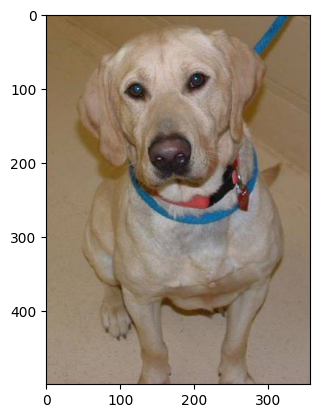

In [47]:
img=mpimg.imread('/kaggle/working/train/dog.9850.jpg')
imgplt=plt.imshow(img)

plt.show()

### b) Showing Cat images

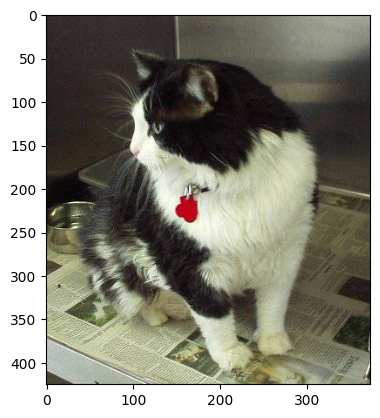

In [48]:
img=mpimg.imread('/kaggle/working/train/cat.8771.jpg')
imgplt=plt.imshow(img)

plt.show()

- #### Now we have to resize all of the cat and dog images into the same resolution

### In this scenario, only using first three letters of the cat and dog images, it's a huge dataset -- So it's a good practice.

In [49]:
file_name=os.listdir('/kaggle/working/train')

for i in range (5):
    name=file_name[i]
    print(name[0:3])

cat
cat
dog
cat
cat


# 5) Counting how many Dog and Cat images are in present here.

In [50]:
file_name=os.listdir('/kaggle/working/train')

dog_count=0
cat_count=0

for img_file in file_name:
    
    name=img_file[0:3]

    if name=='dog':
        dog_count +=1
    else:
        cat_count +=1

print('Number of Dog images: ',dog_count)
print('Number of Cat images: ',cat_count)

Number of Dog images:  12500
Number of Cat images:  12500


### Resizing the images

- **Creating the directory for resized images**

In [51]:
os.mkdir('/kaggle/working//image_resized')

In [52]:
original_folder='/kaggle/working/train/'
resized_folder='/kaggle/working//image_resized/'

for i in range(2000):

    filename=os.listdir(original_folder)[i]
    img_path=original_folder+filename


    # Resizing the images

    img=Image.open(img_path)
    img=img.resize((224,224))
    img=img.convert('RGB')


    newImgPath=resized_folder+filename
    img.save(newImgPath)

### i) Viewing the resized dog image

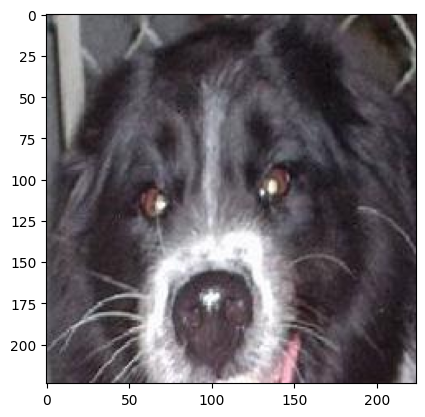

In [58]:
img=mpimg.imread('/kaggle/working/image_resized/dog.8766.jpg')
imgplt=plt.imshow(img)

plt.show()

### ii) Viewing the resized Cat images

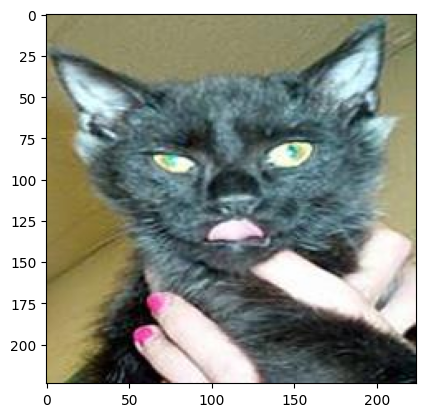

In [64]:
img=mpimg.imread('/kaggle/working/image_resized/cat.4892.jpg')
imgplt=plt.imshow(img)

plt.show()

# 6) Creating Labels for resized images of dogs and cats

- **cat --> 0**
- **dog --> 1**

### Creating a for loop for assign labels

In [65]:
filename=os.listdir('/kaggle/working/image_resized/')

labels=[]

for i in range(2000):

    file_name=filename[i]
    label=file_name[0:3]


    if label=='dog':
        labels.append(1)

    else:
        labels.append(0)

- **Showing the actual files.**

In [66]:
print(filename[0:5])

print(len(filename))

['cat.4892.jpg', 'cat.8458.jpg', 'dog.1864.jpg', 'cat.10568.jpg', 'cat.2588.jpg']
2000


- **Total the number of labels**

In [67]:
print(labels[0:5])

print(len(labels))

[0, 0, 1, 0, 0]
2000


- **Counting the images of Dog and Cats out of 2000 images**

In [68]:
values, counts=np.unique(labels, return_counts=True)

print(values)
print(counts)

[0 1]
[1013  987]


# 7) Converting all the resized images to numpy arrays

In [69]:
import cv2
import glob

In [70]:
image_directory='/kaggle/working/image_resized/'
image_extension=['png','jpg']

files=[]

# checking the files if it is jpg or png then convert into numpy array
[files.extend(glob.glob(image_directory + "*." + e)) for e in image_extension]

# convert into numpy array and convert into a single numpy array
dog_cat_images=np.asarray([cv2.imread(file) for file in files ])

In [71]:
print(dog_cat_images)

[[[[ 98 138 143]
   [ 97 137 142]
   [ 97 137 142]
   ...
   [ 85 123 117]
   [ 85 123 117]
   [ 87 125 119]]

  [[ 99 139 144]
   [ 98 138 143]
   [ 98 138 143]
   ...
   [ 87 125 119]
   [ 89 127 121]
   [ 90 128 122]]

  [[101 141 146]
   [100 140 145]
   [ 99 139 144]
   ...
   [ 89 127 121]
   [ 91 129 123]
   [ 93 131 125]]

  ...

  [[ 98 165 174]
   [ 99 166 175]
   [105 167 178]
   ...
   [ 36  33  25]
   [ 32  27  24]
   [ 26  21  18]]

  [[ 99 166 175]
   [100 167 176]
   [107 169 180]
   ...
   [ 75  72  64]
   [ 58  53  50]
   [ 42  37  34]]

  [[100 167 176]
   [102 169 178]
   [108 170 181]
   ...
   [ 19  16   8]
   [ 11   6   3]
   [ 12   7   4]]]


 [[[ 30  49  62]
   [ 38  57  70]
   [ 52  71  86]
   ...
   [206 223 226]
   [206 223 226]
   [206 223 226]]

  [[ 26  45  58]
   [ 33  52  65]
   [ 45  64  79]
   ...
   [203 220 223]
   [205 222 225]
   [207 224 227]]

  [[ 27  49  61]
   [ 32  54  66]
   [ 41  62  77]
   ...
   [200 215 218]
   [203 220 223]
   [208 225

- **showing the type**

In [72]:
type(dog_cat_images)

numpy.ndarray

- **showing the shape**

In [73]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


## 8) Train Test Split

In [74]:
 X = dog_cat_images
 y = np.asarray(labels)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


- **1600 --> Training images**
- **400 --> Test images**

## 9) Scalling the data

In [77]:
X_train_scaled=X_train/255

X_test_scaled=X_test/255

In [78]:
print(X_train_scaled)

[[[[0.09411765 0.21960784 0.38039216]
   [0.09411765 0.21960784 0.38039216]
   [0.08627451 0.22352941 0.38039216]
   ...
   [0.34901961 0.51372549 0.58823529]
   [0.38431373 0.52941176 0.60784314]
   [0.34901961 0.49803922 0.56862745]]

  [[0.09803922 0.22352941 0.39215686]
   [0.09019608 0.22745098 0.38431373]
   [0.09019608 0.22745098 0.38431373]
   ...
   [0.34901961 0.51372549 0.58823529]
   [0.38431373 0.52941176 0.60784314]
   [0.34901961 0.49803922 0.56862745]]

  [[0.09411765 0.22352941 0.4       ]
   [0.09019608 0.22745098 0.39607843]
   [0.09019608 0.22745098 0.39607843]
   ...
   [0.34509804 0.50980392 0.58431373]
   [0.38431373 0.52941176 0.60784314]
   [0.35294118 0.50196078 0.57254902]]

  ...

  [[0.00784314 0.         0.00392157]
   [0.01176471 0.         0.00784314]
   [0.01960784 0.01176471 0.01176471]
   ...
   [0.         0.08235294 0.3254902 ]
   [0.         0.08627451 0.32941176]
   [0.         0.08627451 0.32941176]]

  [[0.00784314 0.         0.00392157]
   [0.0

# 10) Building the Neural Network - MobileNet V2

In [79]:
import tensorflow as tf
import tensorflow_hub as hub

In [80]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

- #### i) Building the model

In [82]:
num_of_classes=2

model=tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

# Showing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


- #### ii) Compiling the model

In [83]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

- #### iii) Training the model

In [91]:
history=model.fit(X_train_scaled, y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 1s 27ms/step - loss: 0.0067 - acc: 1.0000
Epoch 2/5
50/50 [==============================] - 1s 27ms/step - loss: 0.0063 - acc: 0.9994
Epoch 3/5
50/50 [==============================] - 1s 26ms/step - loss: 0.0059 - acc: 0.9994
Epoch 4/5
50/50 [==============================] - 1s 26ms/step - loss: 0.0052 - acc: 0.9994
Epoch 5/5
50/50 [==============================] - 1s 27ms/step - loss: 0.0051 - acc: 0.9994


- #### Model Evaluation

In [92]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 0s 27ms/step - loss: 0.0565 - acc: 0.9800
Test Loss = 0.05651155859231949
Test Accuracy = 0.9800000190734863


# 11) Predictive System

- ### i) For Dog 🐶

Path of the image to be predicted /kaggle/working/train/dog.4998.jpg


1/1 [==============================] - 0s 26ms/step
[[-1.7758657   0.16218305]]
1
The image is dog


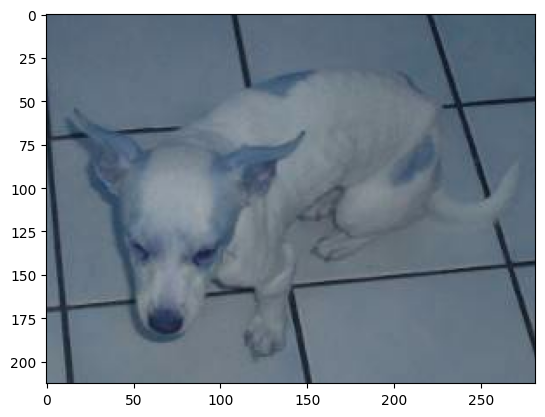

In [97]:
# Take user input as image
input_img_path=input('Path of the image to be predicted')

# read this image and load into numpy array
input_image=cv2.imread(input_img_path)

# display the image
plt.imshow(input_image)

# later that resize the image
input_image_resize=cv2.resize(input_image,(224,224))

# scale the image
input_image_scaled=input_image_resize/255

# now reshaping the numpy array --> to tell the model that I am making predictions for only 1 image, that's why I am using 1 here.
image_reshaped=np.reshape(input_image_scaled, [1,224,224,3])

# pass this image_reshaped into input_prediction
input_prediction=model.predict(image_reshaped)

print(input_prediction)

# now pass into np.argmax and np.argmax is nothing but the prediction.
input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
    print('The image is cat ')

else:
    print('The image is dog')

- ### For Cat🐈

Path of the image to be predicted /kaggle/working/train/cat.5147.jpg


1/1 [==============================] - 0s 25ms/step
[[ 6.613819  -6.2282043]]
0
The image is cat 


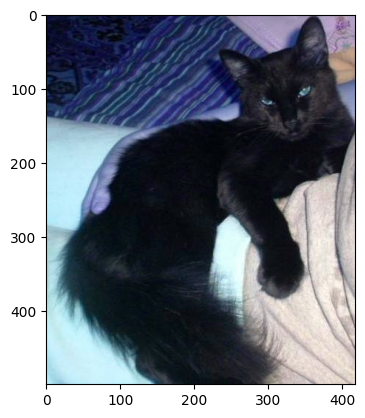

In [99]:
# Take user input as image
input_img_path=input('Path of the image to be predicted')

# read this image and load into numpy array
input_image=cv2.imread(input_img_path)

# display the image
plt.imshow(input_image)

# later that resize the image
input_image_resize=cv2.resize(input_image,(224,224))

# scale the image
input_image_scaled=input_image_resize/255

# now reshaping the numpy array --> to tell the model that I am making predictions for only 1 image, that's why I am using 1 here.
image_reshaped=np.reshape(input_image_scaled, [1,224,224,3])

# pass this image_reshaped into input_prediction
input_prediction=model.predict(image_reshaped)

print(input_prediction)

# now pass into np.argmax and np.argmax is nothing but the prediction.
input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
    print('The image is cat ')

else:
    print('The image is dog')

# Thank You!

Thank you for taking the time to explore my notebook! I hope you found it informative and insightful.

----------------------------------------------------------------------------------------------------------------------------------------